In [1]:
import tensorflow as tf
from tensorflow.contrib.layers import fully_connected
from tensorflow.examples.tutorials.mnist import input_data
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize
import math as math
from sklearn.neighbors import NearestNeighbors
import sklearn as skl
from sklearn.metrics import f1_score

In [2]:
DATA_DIR = 'MNIST'
STEPS = 1000
MINIBATCH_SIZE = 50

imgDim = 28
imgChannels = 1

input_feature_width = imgDim * imgDim
number_of_outputs = input_feature_width
num_hidden_units = 10
learning_rate = 0.01

In [3]:
def get_data(mnist):
    batch = mnist.test.next_batch(2000)
    stratified_data, stratified_labels = get_stratified_data(batch[0], batch[1], 100)
    #print(stratified_data)
    #print(len(stratified_data))
    #print(batch[0].shape)
    #images = batch[0].reshape(1000, 784)
    return stratified_data, stratified_labels


def get_stratified_data(data, labels, min_size):
    labels = np.array([np.where(r==1)[0][0] for r in labels ])
    ret_data = {}
    _data = []
    _labels = []
    #print(labels.shape)
    for i in range(len(data)):
        if not int(labels[i]) in ret_data:
            ret_data[int(labels[i])] = 1
        else:
            if(ret_data[int(labels[i])] <= min_size):
                ret_data[int(labels[i])] += 1
                _data.append(data[i])
                _labels.append(int(labels[i]))
            else:
                pass
                #print(str(int(labels[i])) + " has " + str(min_size))
    return _data, np.array(_labels)
    


In [4]:
X = tf.placeholder(tf.float32, shape=[None, input_feature_width])
hidden = tf.layers.dense(X, num_hidden_units)
output = tf.layers.dense(hidden, number_of_outputs)
reconstruction_loss = tf.reduce_mean(tf.square(output - X))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(reconstruction_loss)

In [5]:
init = tf.global_variables_initializer()

In [6]:
mnist = input_data.read_data_sets(DATA_DIR, one_hot=True)
X_train, labels = get_data(mnist)
codings = hidden
reconstuction_loss_values = []

with tf.Session() as sess:
    init.run()
    for iteration in range(STEPS):
        training_op.run(feed_dict={X:X_train})
        reconstuction_loss_values.append(reconstruction_loss.eval(feed_dict={X:X_train}))
    data_points = codings.eval(feed_dict={X:X_train})
    data = X_train[0].reshape(1,input_feature_width)
    codings_val1 = codings.eval(feed_dict={X:data})
    #print(codings_val1)


Extracting MNIST/train-images-idx3-ubyte.gz
Extracting MNIST/train-labels-idx1-ubyte.gz
Extracting MNIST/t10k-images-idx3-ubyte.gz
Extracting MNIST/t10k-labels-idx1-ubyte.gz


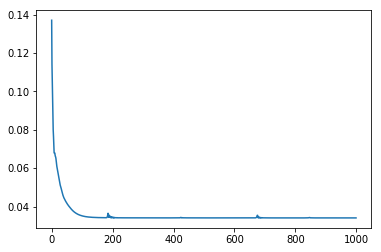

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(reconstuction_loss_values)


# Reconstruction loss plotted as above

In [8]:
print(labels.shape)
print(labels[10])
integer_labels = labels #np.array([np.where(r==1)[0][0] for r in labels ])
print(integer_labels[34])
print(integer_labels.shape)


(1000,)
2
3
(1000,)


In [9]:
def get_k_nearest_neighbor_indices(input_data, number_of_neighbors, index_of_the_target_node = 0):
    nbrs = NearestNeighbors(n_neighbors=number_of_neighbors, algorithm='brute').fit(input_data)
    distances, indices = nbrs.kneighbors(input_data)
    return indices[index_of_the_target_node]

number_to_show_for = 5
index_of_target_node = np.where(integer_labels == number_to_show_for)[0][0]
label_of_target_node = integer_labels[index_of_target_node]
k_nearest_neighbor_indices = get_k_nearest_neighbor_indices(data_points, 50, index_of_target_node)
predictions = map(lambda index: integer_labels[index], k_nearest_neighbor_indices)
truth = np.ones((50)) * label_of_target_node

intLabelling = np.vectorize(lambda x: int(x))
truth = intLabelling(truth)
f1 = skl.metrics.f1_score(truth, predictions, average='micro')  
precision = skl.metrics.precision_score(truth, predictions, average='micro')
recall = skl.metrics.recall_score(truth, predictions, average='micro')
print('\nTest Precision=%.2f' % (precision))
print('Test Recall=%.2f' % (recall))
print('Test F1 Score=%.2f' % (f1))

print "\nPrediction", "Truth" , "   Result"
for i in range(len(predictions)):
    print predictions[i],"           " ,int(truth[i]) , "   ", "correct" if predictions[i] - truth[i] == 0 else "incorrect"

    


Test Precision=0.48
Test Recall=0.48
Test F1 Score=0.48

Prediction Truth    Result
5             5     correct
5             5     correct
5             5     correct
5             5     correct
5             5     correct
3             5     incorrect
5             5     correct
3             5     incorrect
5             5     correct
5             5     correct
5             5     correct
5             5     correct
5             5     correct
8             5     incorrect
5             5     correct
8             5     incorrect
3             5     incorrect
5             5     correct
8             5     incorrect
8             5     incorrect
8             5     incorrect
5             5     correct
5             5     correct
3             5     incorrect
8             5     incorrect
5             5     correct
8             5     incorrect
6             5     incorrect
5             5     correct
8             5     incorrect
3             5     incorrect
6             5    